# Global plot style

In [214]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import os
import glob

# Set the color cycle to use colors from the 'magma' colormap
def set_cycle(num_colors = 10):
    colors = plt.cm.magma(np.linspace(0, 1, num_colors))
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

set_cycle()

# Error vs Wavelength

results_fd_4_PWave_NWavelength
results_fd_2_PWave_NWavelength
results_gaussian_wavelength
results_base_fft_PWave_NWavelength
results_gramfe_fft_PWave_NWavelength
results_fd_4_conserve_mass_PWave_NWavelength
results_fd_2_conserve_mass_PWave_NWavelength
results_gaussian_lag
     PWave_NWavelength   Error(Dens)   Error(Real)   Error(Imag)  \
0                    1  1.889970e-11  8.057823e-08  8.057823e-08   
1                    2  4.838005e-09  5.126799e-06  5.126799e-06   
2                    3  1.239557e-07  5.833917e-05  5.833917e-05   
3                    4  1.237170e-06  3.278799e-04  3.278799e-04   
4                    5  7.361792e-06  1.233333e-03  1.233333e-03   
..                 ...           ...           ...           ...   
151                 35  8.271676e-01  8.955464e-01  8.955465e-01   
152                 36  4.938620e-01  5.406109e-02  6.602762e-01   
153                 37  6.418099e-01  9.691108e-01  9.691107e-01   
154                 38  4.736105e-01  3.536534e

Plot saved as 'plane_wave_errors_vs_wavelength.png'


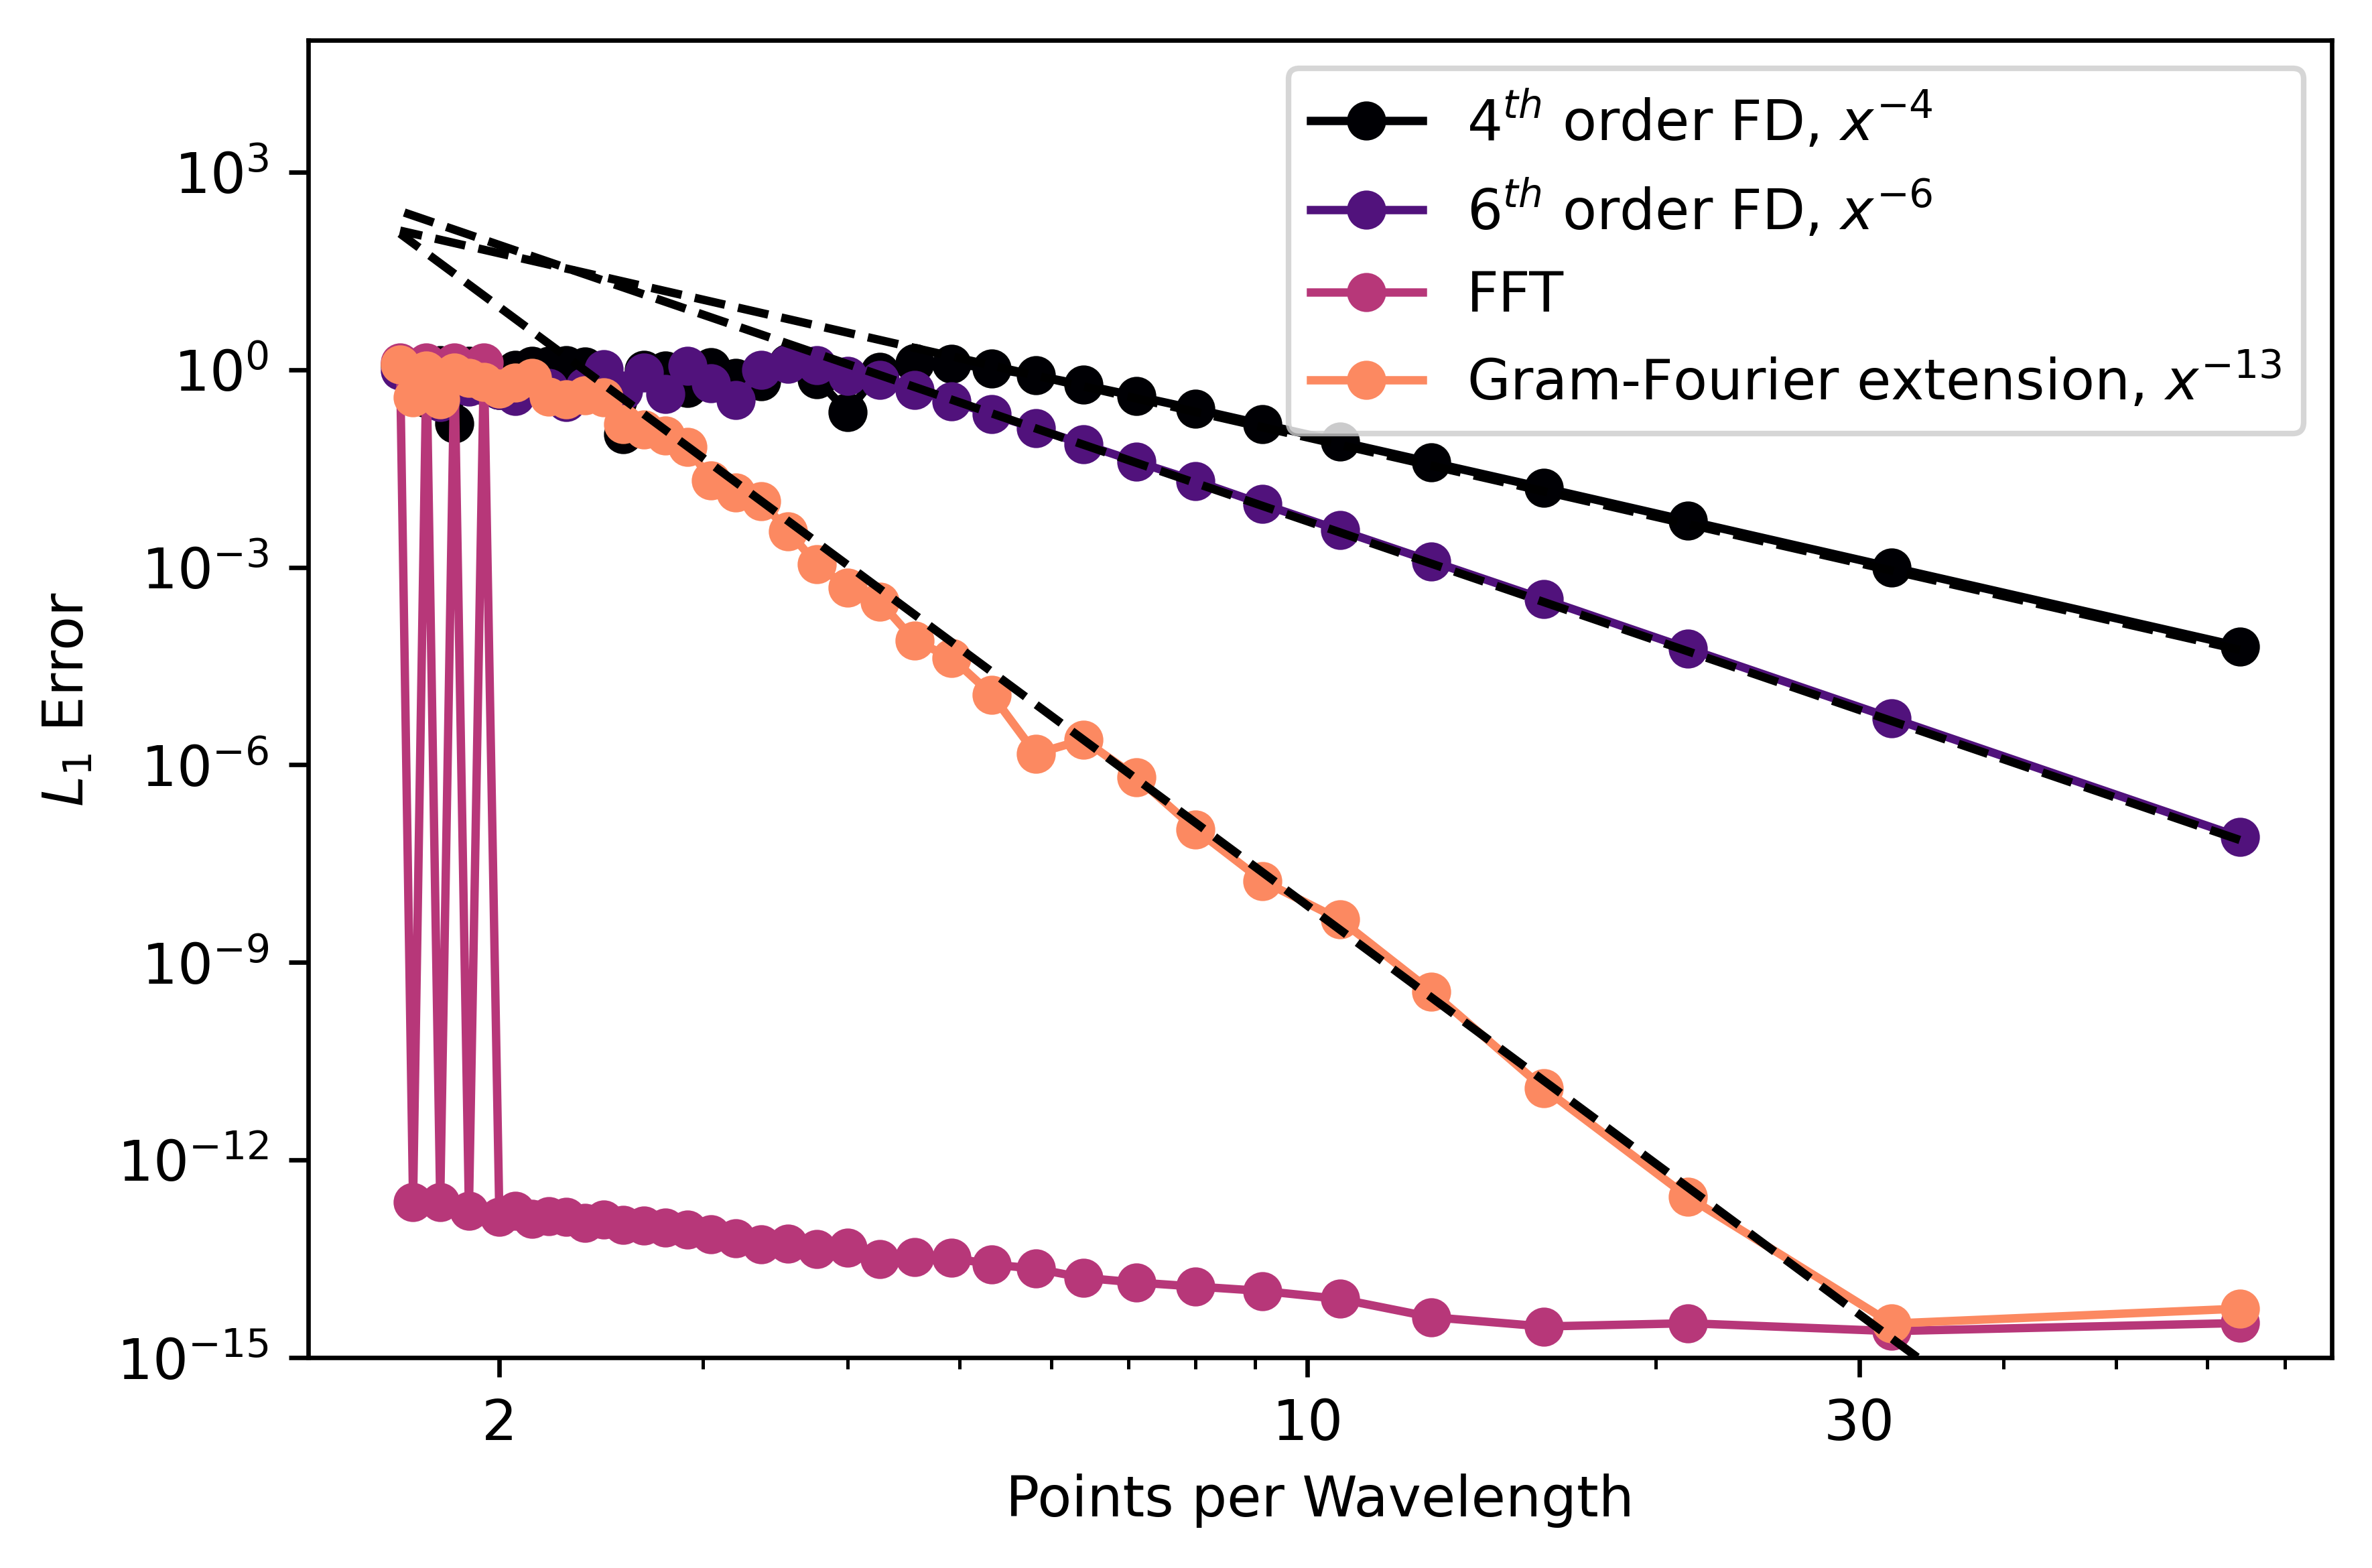

In [163]:

# Directory where your CSV files are stored
directory_path = 'results'

# Manually specify labels for each CSV file (base filename without directory and extension)
labels = {
    'results_base_fft_PWave_NWavelength': 'FFT',
    'results_fd_2_PWave_NWavelength': '$4^{th}$ order FD, $x^{-4}$',
    'results_fd_4_PWave_NWavelength': '$6^{th}$ order FD, $x^{-6}$',
    'results_gramfe_fft_PWave_NWavelength': 'Gram-Fourier extension, $x^{-13}$',
    # Add more mappings as needed
}

# Pattern to match CSV files
pattern = os.path.join(directory_path, 'results_*.csv')

# List all CSV files in the directory
csv_files = glob.glob(pattern)

# Initialize an empty DataFrame to store combined data
combined_df = pd.DataFrame()

# Read each CSV file, assign a manual label, and append to combined DataFrame
for file in csv_files:
    # Extract base filename without directory and extension to match with labels
    base_filename = os.path.basename(file)[:-4]  # Remove the last 4 characters (.csv)
    print(base_filename)
    if base_filename in labels:
        # Read CSV file
        df = pd.read_csv(file)
        # Assign label
        df['Label'] = labels[base_filename]
        # Append to combined DataFrame
        combined_df = pd.concat([combined_df, df], ignore_index=True)

print(combined_df)

# Sort the DataFrame by PWave_NWavelength for consistent plotting
combined_df.sort_values('PWave_NWavelength', inplace=True)

combined_df.to_csv("results/results_planewave_wavelength.csv")
# Plotting
plt.figure(figsize=(6, 4), dpi=600)  # High-resolution plot

N_points = 64

# Plot data for each label
for label, group_df in combined_df.groupby('Label'):
    x = N_points / group_df['PWave_NWavelength']
    y = 0.5 * (group_df['Error(Real)'] + group_df['Error(Imag)'])
    plt.plot(x, y, label=f'{label}', marker='o', linestyle='-')

    # Plotting reference lines based on label
    if label == '$4^{th}$ order FD, $x^{-4}$':
        y_ref = y.iloc[10] * (x/x.iloc[10])**-4
        plt.plot(x, y_ref, 'k--')
    elif label == '$6^{th}$ order FD, $x^{-6}$':
        y_ref = y.iloc[10] * (x/x.iloc[10])**-6
        plt.plot(x, y_ref, 'k--')
    elif label == 'Gram-Fourier extension, $x^{-13}$':
        y_ref = y.iloc[9] * (x/x.iloc[9])**-13
        plt.plot(x, y_ref, 'k--')
#plt.title('Real and Imaginary Part Errors as a Function of Wavelength')
plt.xlabel('Points per Wavelength')
plt.ylabel('$L_1$ Error')
plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-15, 1e5])
# Optional: Customizing tick labels for clarity
plt.xticks([2, 10, 30], ['2','10','30'])
# Adding legend
plt.legend(loc="upper right")

# Show or save the plot
plt.tight_layout()
plt.savefig('plots/plane_wave_errors_vs_wavelength.png')  # Save the plot as a PNG file
# plt.show()  # Uncomment to display the plot instead

print("Plot saved as 'plane_wave_errors_vs_wavelength.png'")


## Gaussian wave packet

### Derive relationship between velocity and minimum wavelength

       Coord.      Real      Imag     Phase
NaN  0.003906 -0.665369 -0.926940 -2.193377
NaN  0.011719 -0.094574 -1.246837 -1.646502
NaN  0.019531  0.618234 -1.213561 -1.099627
NaN  0.027344  1.254864 -0.774123 -0.552752
NaN  0.035156  1.586448 -0.009324 -0.005877
..        ...       ...       ...       ...
NaN  0.964844  0.140779  0.643545  1.355433
NaN  0.972656 -0.242247  0.703767  1.902308
NaN  0.980469 -0.643331  0.533576  2.449183
NaN  0.988281 -0.923007  0.135286  2.996058
NaN  0.996094 -0.952631 -0.404272 -2.740252

[128 rows x 4 columns]
Minimum Wavelength: 0.0859375


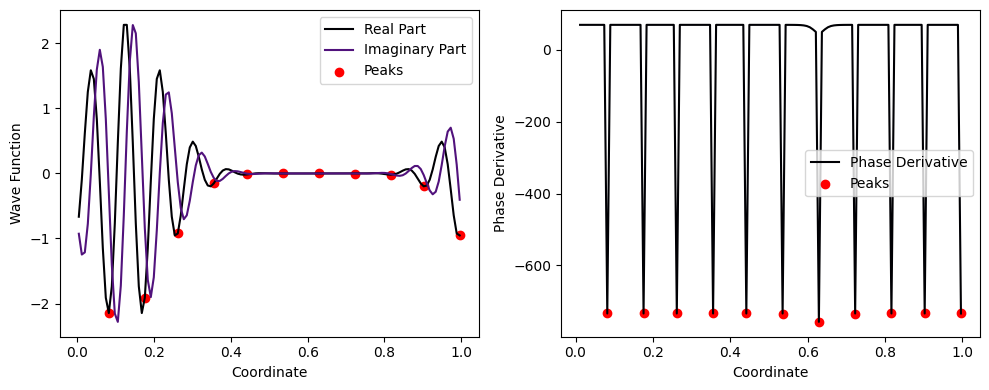

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Placeholder for reading your CSV (make sure to have your actual path here)
df = pd.read_csv("results/Gaussian_Imag_000000", delimiter=" ")
df = df.sort_values(by='Coord.')

# Assuming df is your DataFrame and it has 'Coord.' and 'Analytical' columns
coords = df["Coord."]
imag   = df["Analytical"]

df     = pd.read_csv("results/Gaussian_Real_000000", delimiter=" ")
df     = df.sort_values(by='Coord.')
real   = df["Analytical"]

df = pd.DataFrame({"Coord.": coords, "Real": real, "Imag": imag})
# Calculate the phase of the wave function
df['Phase'] = np.arctan2(df['Imag'], df['Real'])
print(df)

# Calculate the derivative of the phase with respect to the coordinate
# Note: Ensure coordinates are sorted
df = df.sort_values(by='Coord.')
phase_derivative = np.diff(df['Phase'].to_numpy()) / np.diff(df['Coord.'].to_numpy())

# Detect peaks: where the derivative of the phase changes sign
sign_changes = phase_derivative < -100

# Adjust peak indices by +1 due to the way np.diff() reduces array size
peak_indices = np.where(sign_changes)[0] + 1

# Assuming 'df' is your DataFrame with 'Coord.', 'Real', and 'Imag' columns
# and 'peak_indices' contains the indices of identified peaks in the phase

# Extract coordinates of identified peaks
peak_coords = df.iloc[peak_indices]['Coord.']

# Calculate distances between successive peaks
distances_between_peaks = np.diff(peak_coords.to_numpy())

# The minimum wavelength is the smallest of these distances
min_wavelength = np.min(distances_between_peaks) if distances_between_peaks.size > 0 else np.nan

# Output the minimum wavelength
print("Minimum Wavelength:", min_wavelength)

# Plotting for visualization
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(df['Coord.'], df['Real'], label='Real Part')
plt.plot(df['Coord.'], df['Imag'], label='Imaginary Part')
plt.scatter(df.iloc[peak_indices]['Coord.'], df.iloc[peak_indices]['Real'], color='red', label='Peaks')
plt.xlabel('Coordinate')
plt.ylabel('Wave Function')
plt.legend()


# Plotting phase derivative with peaks correctly
plt.subplot(1, 2, 2)
plt.plot(df['Coord.'].iloc[1:], phase_derivative, label='Phase Derivative')  # Adjusted for phase_derivative indexing
# Since peak_indices are for df, align peak_coords for plotting on phase_derivative
plt.scatter(peak_coords, [phase_derivative[i-1] for i in peak_indices], color='red', label='Peaks')  # Corrected
plt.xlabel('Coordinate')
plt.ylabel('Phase Derivative')
plt.legend()

plt.tight_layout()
plt.show()

In [167]:
128 * min_wavelength / 0.01, 128 * min_wavelength / 10

(1100.0, 1.1)

In [178]:
128 / 0.1, 128 / 128

(1280.0, 1.0)

### Plot error vs minimum wavelength

Plot saved as 'errors_vs_wavelength.pdf'


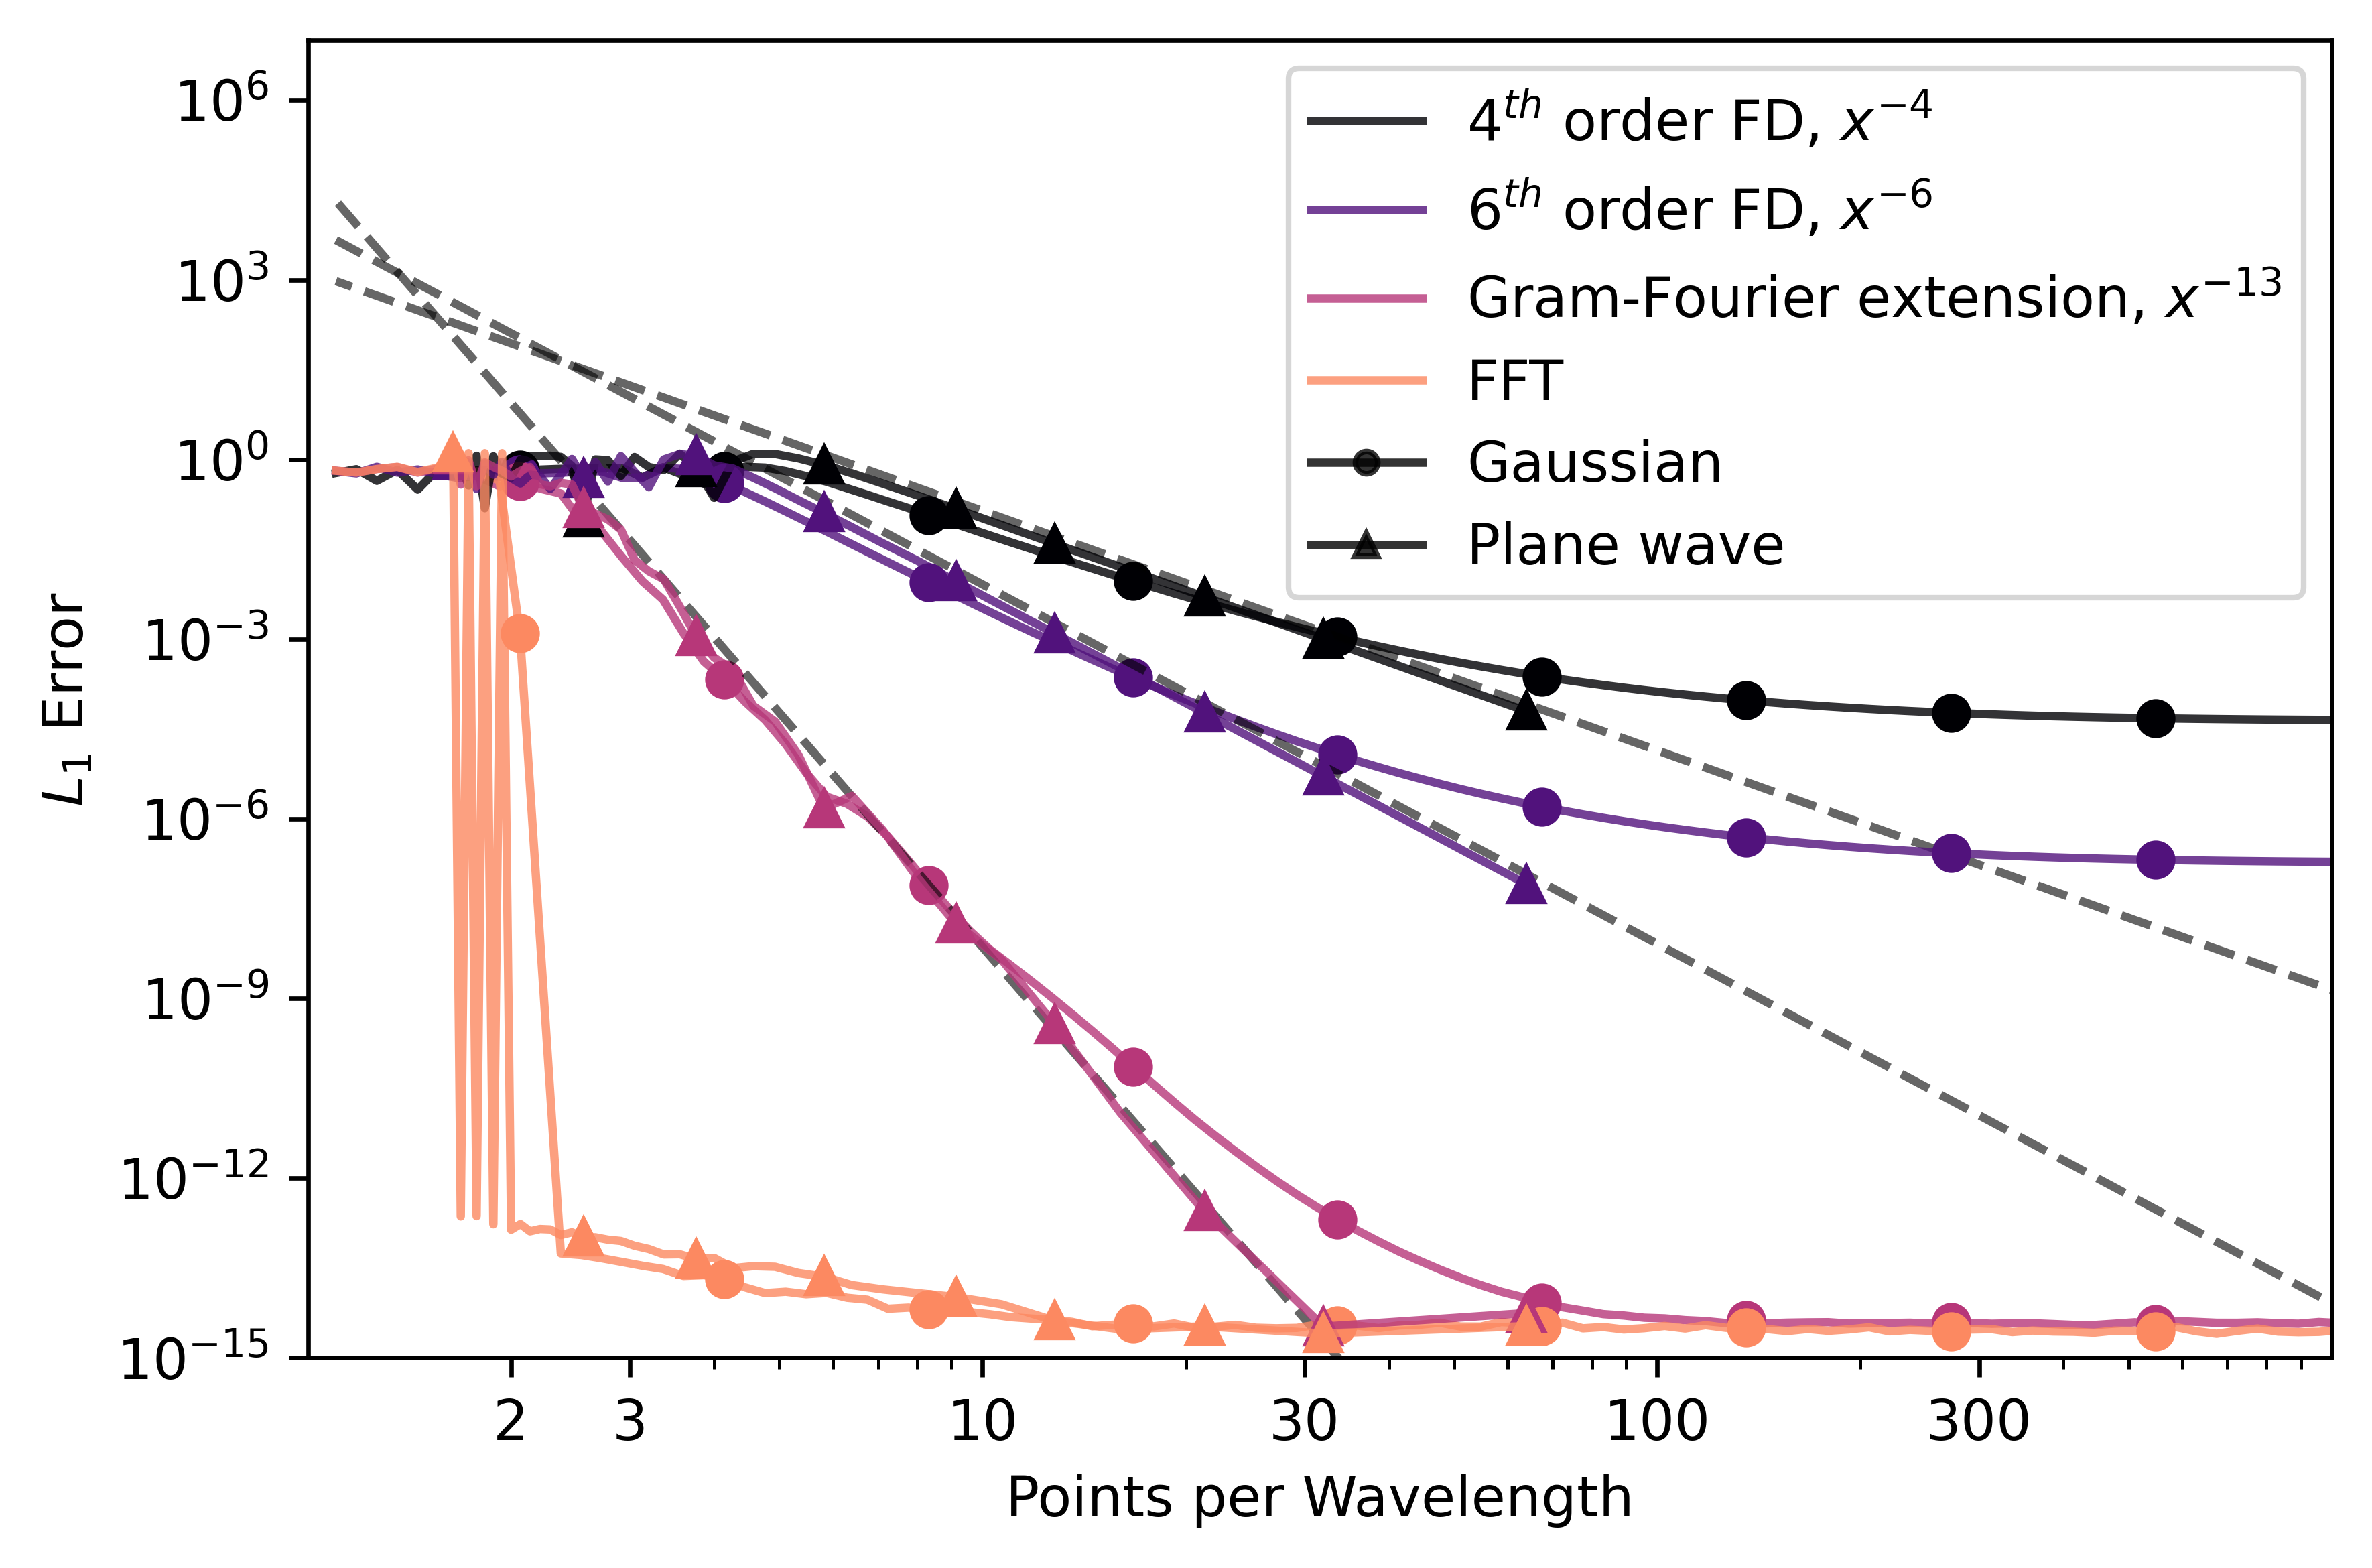

In [221]:

set_cycle(5)
# Path to the CSV file
csv_file_path = 'results/results_gaussian_wavelength.csv'

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Manually specify labels for each run based on the 'RunName'
labels = {
    'fd_2_Gau_v0': '$4^{th}$ order FD, $x^{-4}$',
    'fd_4_Gau_v0': '$6^{th}$ order FD, $x^{-6}$',
    'gramfe_fft_Gau_v0': 'Gram-Fourier extension, $x^{-13}$',
    'base_fft_Gau_v0': 'FFT',
    # Add more mappings as needed
}

# Assign labels based on 'RunName'
df['Label'] = df['RunName'].map(labels)

# Sort the DataFrame by Velocity for consistent plotting
df.sort_values('Velocity', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(6, 4), dpi=600)  # High-resolution plot

N_points = 128

desired_order = [labels["fd_2_Gau_v0"], labels["fd_4_Gau_v0"], labels["gramfe_fft_Gau_v0"], labels["base_fft_Gau_v0"]]  # Update this list to your desired order of labels

# Convert the 'Label' column to a categorical type with the specified order
df['Label'] = pd.Categorical(df['Label'], categories=desired_order, ordered=True)


# Plot data for each label
for label, group_df in df.groupby('Label'):
    x = N_points * min_wavelength / group_df['Velocity']
    y = 0.5 * (group_df['Error(Real)'] + group_df['Error(Imag)'])
    line, = plt.plot(x, y, label=f'{label}', linestyle='-', alpha = 0.8)
    plt.plot(x[::10], y[::10], marker='o', linestyle='', alpha = 1, color=line.get_color())

    # Plotting reference lines based on label
    if label == '$4^{th}$ order FD, $x^{-4}$':
        y_ref = y.iloc[50] * (x/x.iloc[50])**-4
        plt.plot(x, y_ref, 'k--', alpha = 0.6)
    elif label == '$6^{th}$ order FD, $x^{-6}$':
        y_ref = y.iloc[55] * (x/x.iloc[55])**-6
        plt.plot(x, y_ref, 'k--', alpha = 0.6)
    elif label == 'Gram-Fourier extension, $x^{-13}$':
        y_ref = y.iloc[70] * (x/x.iloc[70])**-13
        plt.plot(x, y_ref, 'k--', alpha = 0.6)

plt.gca().set_prop_cycle(None)

combined_df.to_csv("results/results_planewave_wavelength.csv")
N_points = 64

# Convert the 'Label' column to a categorical type with the specified order
combined_df['Label'] = pd.Categorical(combined_df['Label'], categories=desired_order, ordered=True)

# Plot data for each label
for label, group_df in combined_df.groupby('Label'):
    x = N_points / group_df['PWave_NWavelength']
    y = 0.5 * (group_df['Error(Real)'] + group_df['Error(Imag)'])


    # Calculate logarithmically spaced indices based on the length of k, avoiding log10(0)
    indices = np.geomspace(1, len(x), num=10, dtype=int) - 1  # Subtract 1 to adjust for index starting at 0
    # Ensure unique indices if overlapping occurs due to rounding and bounds
    unique_indices = np.unique(indices)

    line, = plt.plot(x, y, linestyle='-', alpha = 0.8)
    line, = plt.plot(x.array[unique_indices], y.array[unique_indices], marker='^', linestyle='', alpha = 1, color=line.get_color())

plt.xlabel('Points per Wavelength')
plt.ylabel('$L_1$ Error')
plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-15, 1e7])
plt.xlim([1, 1000])

# Optional: Customizing tick labels for clarity
plt.xticks([2, 3, 10, 30, 100, 300], ['2','3','10','30','100','300'])

# Create the initial legend
legend1 = plt.legend(loc="upper right")

# Define custom legend handles
custom_handles = [
    Line2D([0], [0], marker='o', color='k', alpha =0.8, markersize=4, label='Gaussian'),
    Line2D([0], [0], marker='^', color='k', alpha =0.8, markersize=4, label='Plane wave')
]

# Retrieve handles and labels from the existing legend
handles1, labels1 = ax.get_legend_handles_labels()

# Combine original handles/labels with the new custom ones
handles_combined = handles1 + custom_handles
labels_combined = labels1 + [handle.get_label() for handle in custom_handles]

# Create a new legend that includes the original and new entries
plt.legend(handles=handles_combined, labels=labels_combined, loc='upper right')


# Show or save the plot
plt.tight_layout()
plt.savefig('plots/gaussian_errors_vs_wavelength.pdf')  # Save the plot as a PNG file
# plt.show()  # Uncomment to display the plot instead

print("Plot saved as 'errors_vs_wavelength.pdf'")


# Gaussian lag

/tmp/ipykernel_5594/1211733132.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title if needed


Plot saved as plots/analytical_vs_numerical_densities_with_error.pdf


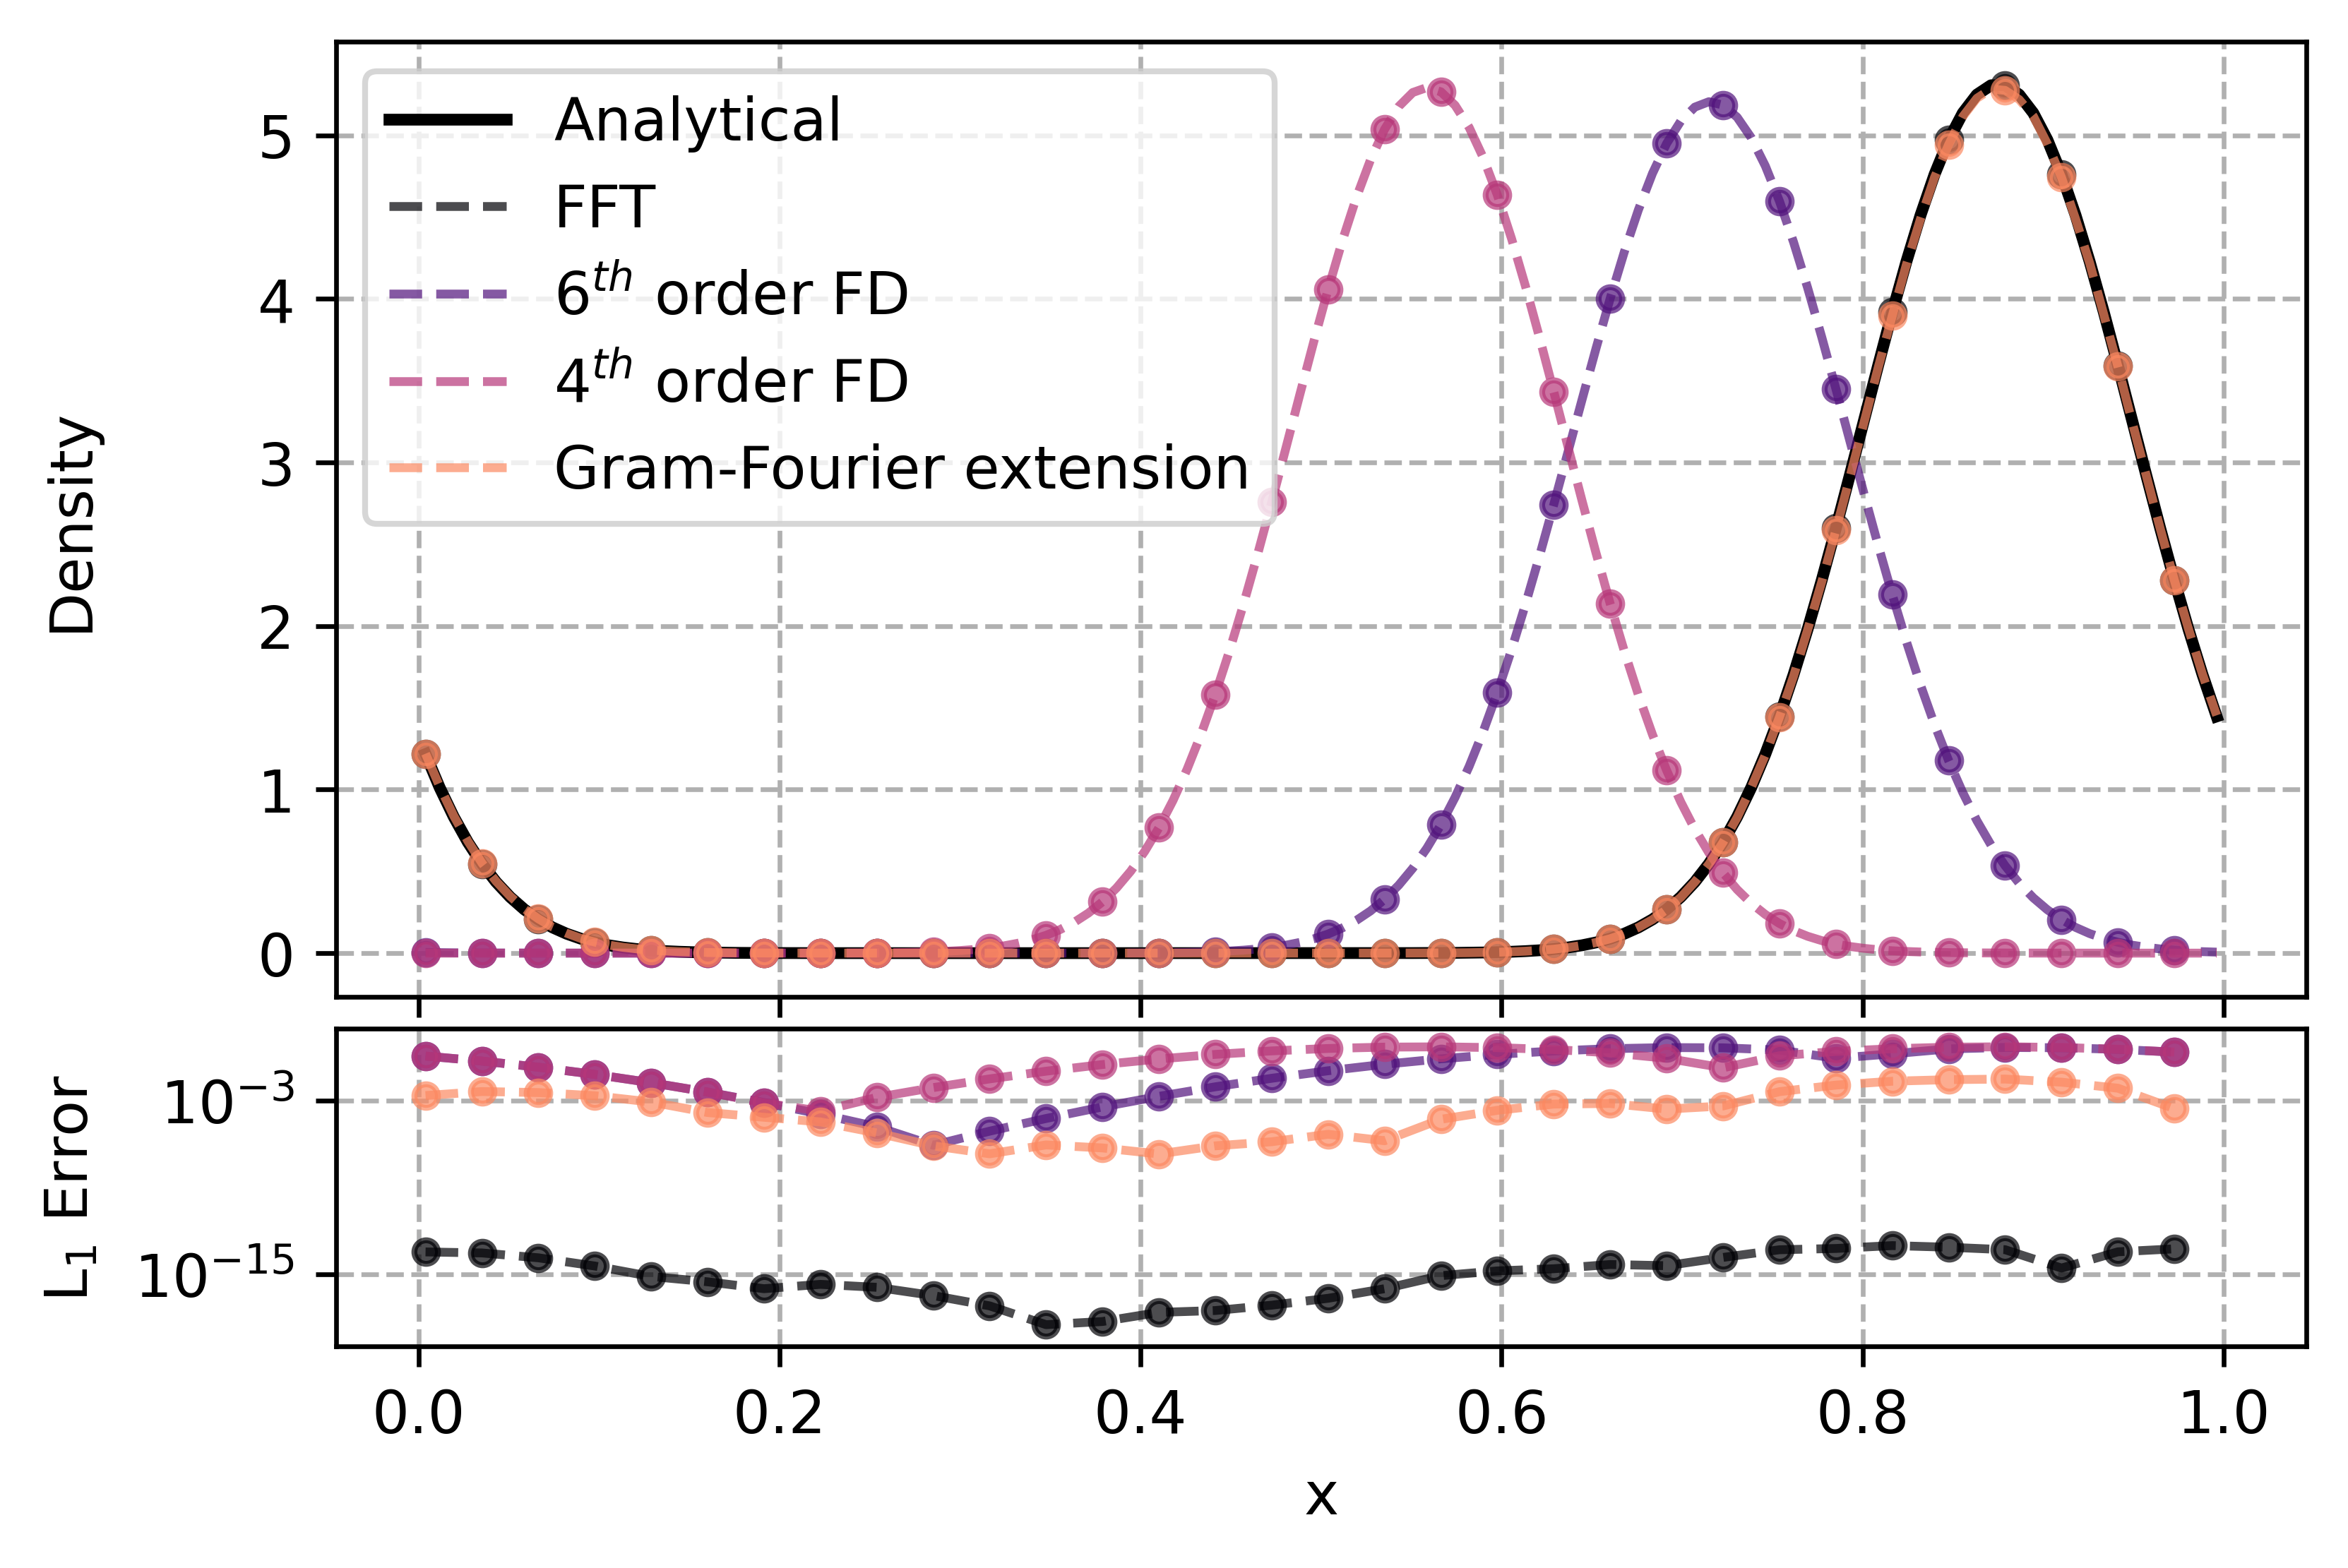

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Load the DataFrame from the CSV file
csv_filename = 'results/combined_density_0_10_t=0.5.csv'  # Update this to your CSV file name
df = pd.read_csv(csv_filename)
# Specify the index of interest
index_of_interest = 5  # Example index, adjust according to your data

# Filter the DataFrame to include only the data for the specified index
df = df[df['Index'] == index_of_interest]

# Create a figure with two subplots that share the x-axis
fig = plt.figure(figsize=(6, 4), dpi=600)  # Increase figure height to accommodate both plots
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.05)  # Adjust subplot sizes and spacing
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)

# Choose a source for the analytical density - let's say the first one in the DataFrame
unique_sources = df['Source'].unique()
analytical_source = unique_sources[0]  # Adjust if you prefer a different source

# Plot the analytical density from the chosen source on the first subplot
df_analytical = df[df['Source'] == analytical_source]
df_analytical = df_analytical.sort_values("Coord.")
ax1.plot(df_analytical['Coord.'], df_analytical['Analytical'], label='Analytical', linestyle='-', color='black', linewidth=2)

labels = {
    "fd_2_results": "$4^{th}$ order FD",
    "fd_4_results": "$6^{th}$ order FD",
    "gramfe_fft_results": "Gram-Fourier extension",
    "base_fft_results": "FFT",
}
# Plot numerical densities from all sources on the first subplot
for source in unique_sources:
    df_source = df[df['Source'] == source]
    df_source = df_source.sort_values("Coord.")
    #ax1.plot(df_source['Coord.'], df_source['Numerical'], label=labels[source], linestyle='--', marker='o', markersize=4, alpha=0.7)
    line, = ax1.plot(df_source['Coord.'], df_source['Numerical'], label=labels[source], linestyle='--', markersize=4, alpha=0.7)
    ax1.plot(df_source['Coord.'][::4], df_source['Numerical'][::4], linestyle='', marker='o', markersize=4, alpha=0.7, color=line.get_color())

# Adding plot title and labels to the first subplot
ax1.set_ylabel('Density')
ax1.legend()
ax1.grid(True, which="both", ls="--")

# Plot the error (mismatch between analytical and numerical) on the second subplot
for source in unique_sources:
    df_source = df[df['Source'] == source]
    df_source = df_source.sort_values("Coord.")
    error = abs(df_source['Numerical'] - df_source['Analytical'])
    #ine, = ax2.plot(df_source['Coord.'], error, label=f'Error - {labels[source]}', linestyle='--', alpha=0.7)
    ax2.plot(df_source['Coord.'][::4], error[::4], label=f'Error - {labels[source]}', linestyle='--', marker='o', markersize=4, alpha=0.7)#, color=line.get_color())

# Set the y-scale of the error plot to logarithmic
ax2.set_yscale('log')
ax2.set_xlabel('x')
ax2.set_ylabel('L$_1$ Error')
ax2.set_ylim(1e-20, 100)
ax2.set_yticks([1e-3, 1e-15])
ax2.grid(True, which="both", ls="--")

ax1.yaxis.set_label_coords(-0.12, 0.5)
ax2.yaxis.set_label_coords(-0.12, 0.5)

# Hide x-tick labels on the first subplot to prevent overlap
plt.setp(ax1.get_xticklabels(), visible=False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title if needed

# Save the plot
output_plot_filename = 'plots/analytical_vs_numerical_densities_with_error.pdf'
plt.savefig(output_plot_filename)
print(f"Plot saved as {output_plot_filename}")

# Uncomment the line below if you want to display the plot as well
# plt.show()


# Power spectrum

In [222]:
redshifts     = np.array([100, 99, 90, 80, 70, 63, 50, 40, 31, 20, 15, 14, 13, 12, 11, 10, 9, 8, 7])
redshifts     = np.sort(redshifts)[::-1]
scale_factors = 1/(redshifts+1)

In [223]:
print("#Dump ID\tDump Time")
for i, a in enumerate(scale_factors):
    print(i, "\t", f"{a:2.16f}")
print("***************END LINE***************")

#Dump ID	Dump Time
0 	 0.0099009900990099
1 	 0.0100000000000000
2 	 0.0109890109890110
3 	 0.0123456790123457
4 	 0.0140845070422535
5 	 0.0156250000000000
6 	 0.0196078431372549
7 	 0.0243902439024390
8 	 0.0312500000000000
9 	 0.0476190476190476
10 	 0.0625000000000000
11 	 0.0666666666666667
12 	 0.0714285714285714
13 	 0.0769230769230769
14 	 0.0833333333333333
15 	 0.0909090909090909
16 	 0.1000000000000000
17 	 0.1111111111111111
18 	 0.1250000000000000
***************END LINE***************


/tmp/ipykernel_5594/1434272426.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


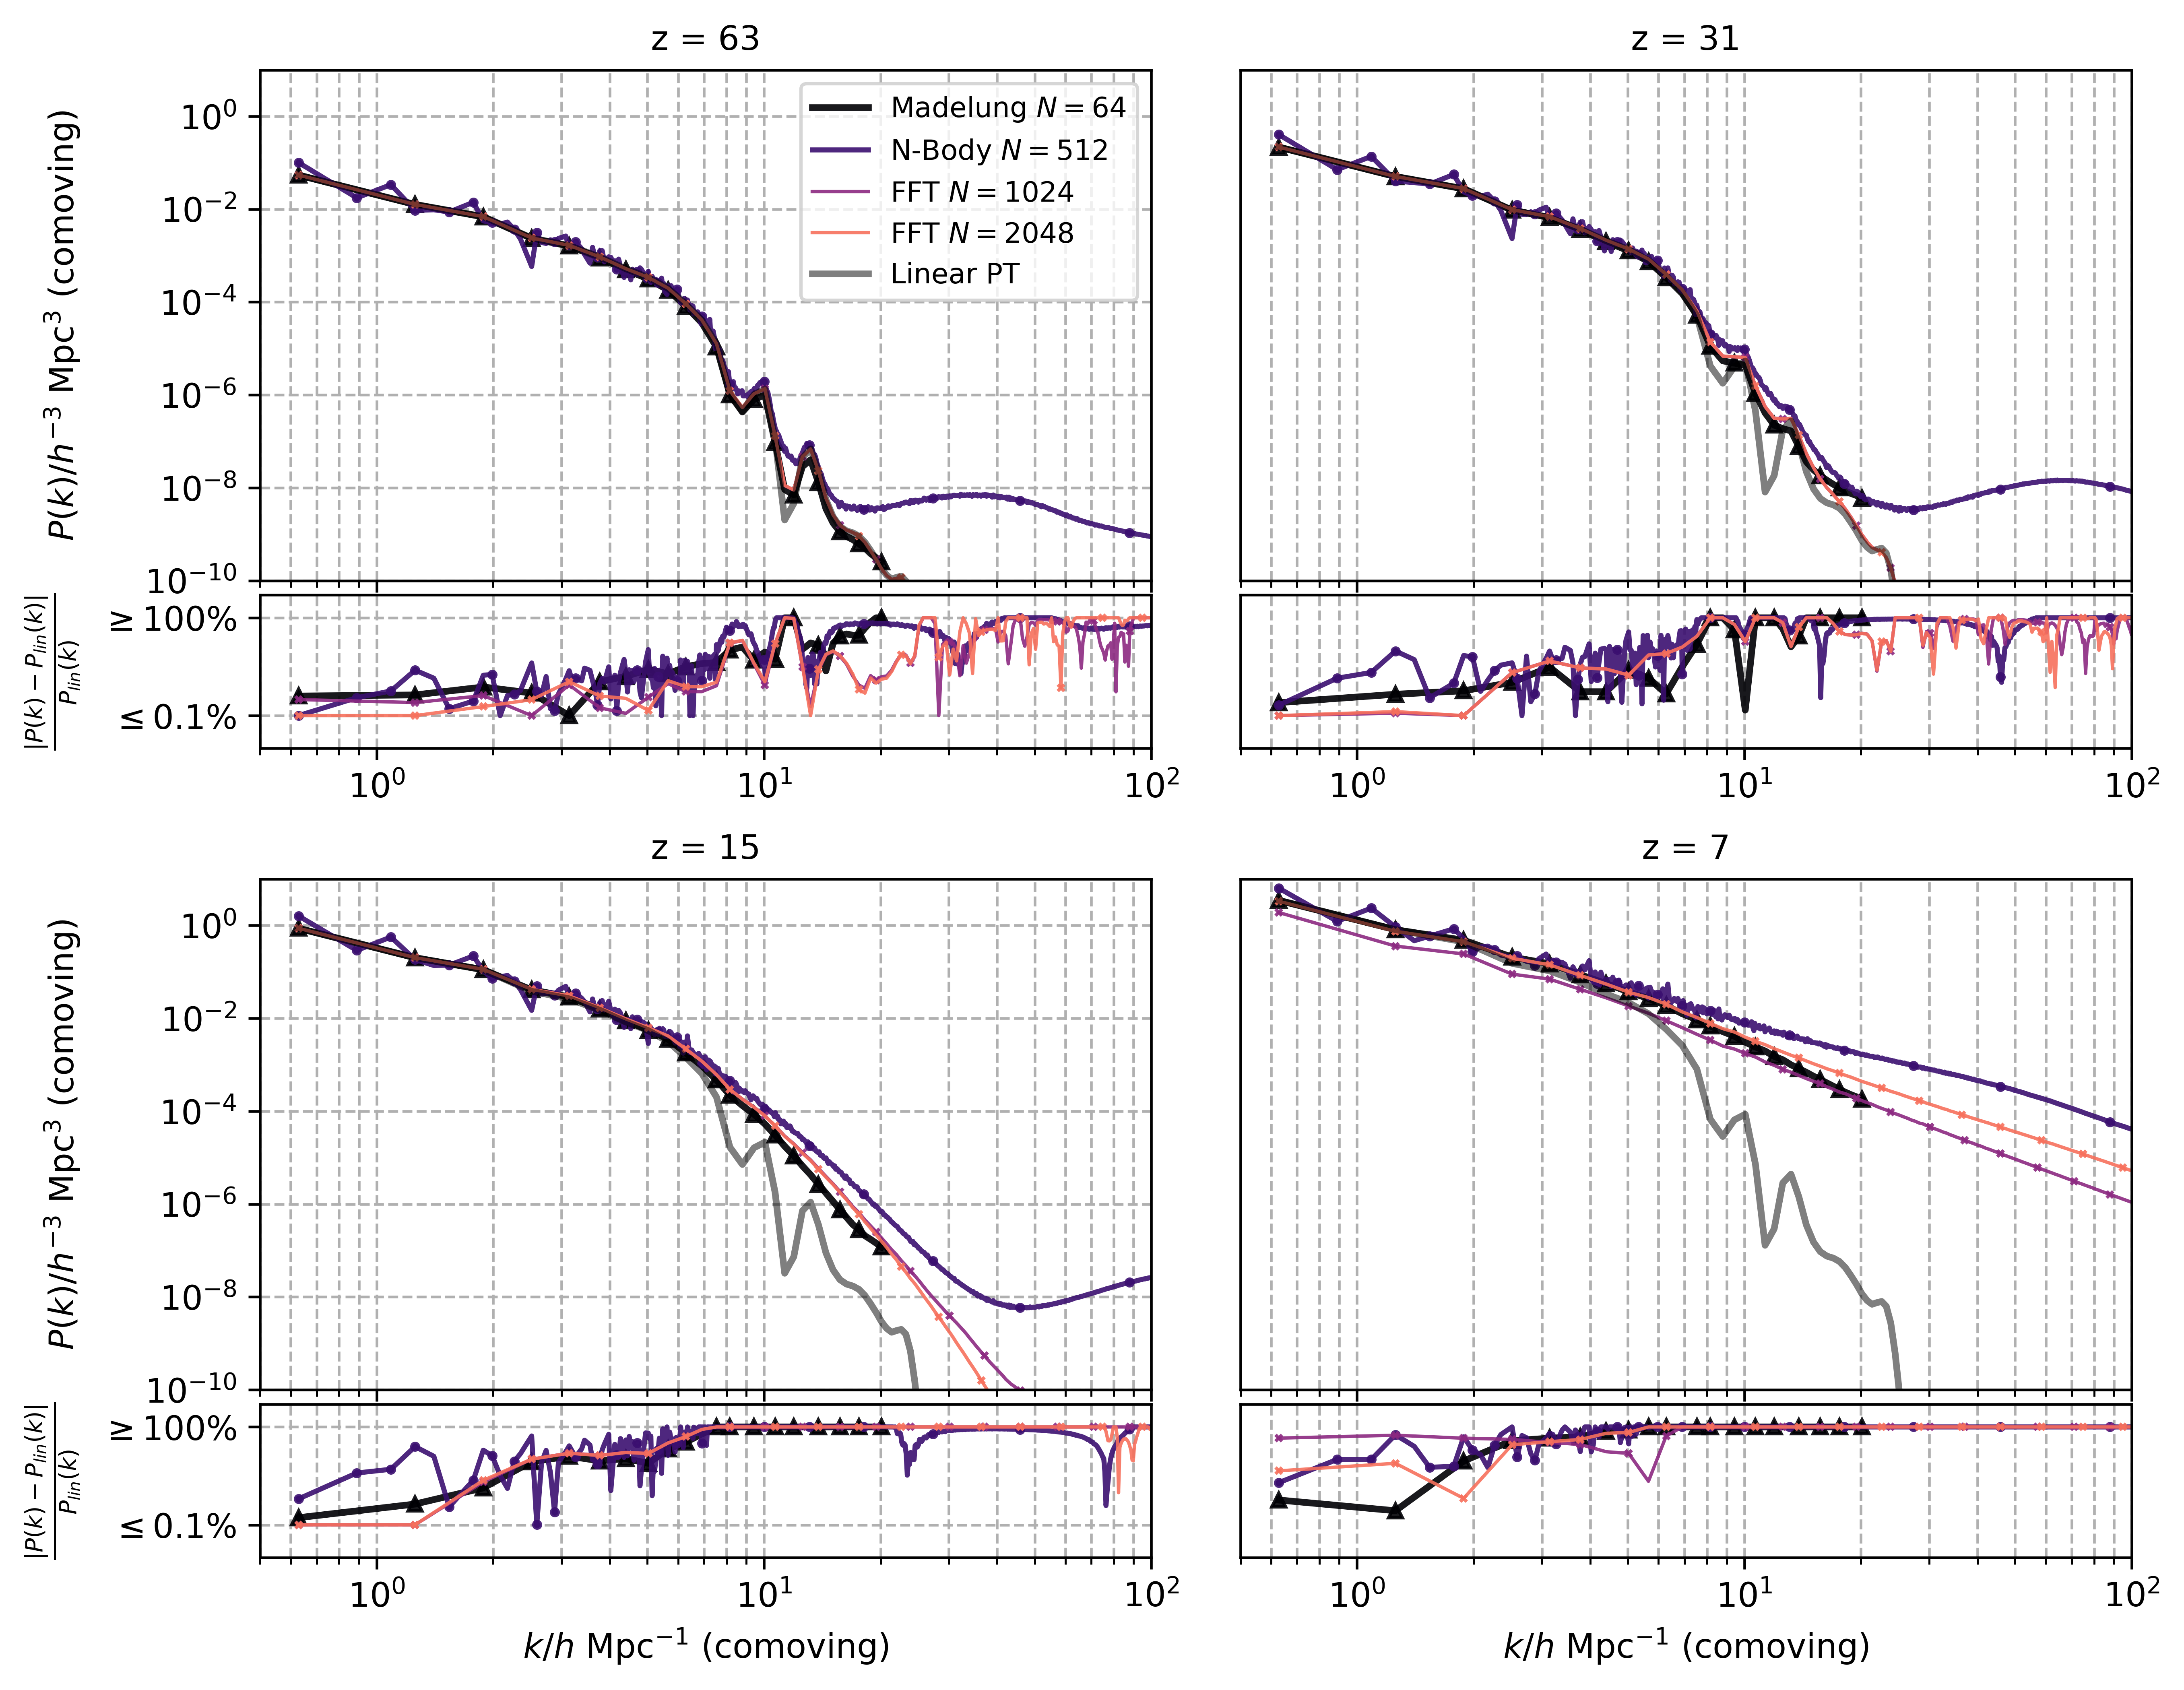

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy
# Read the DataFrame from disk

input_file = "results/fdm_spectra.csv"
fdm_df = pd.read_csv(input_file)
input_file = "results/cdm_spectra.csv"
cdm_df = pd.read_csv(input_file)
combined_df = pd.concat([fdm_df, cdm_df], ignore_index=True)

# Set the color cycle to 'magma'
num_colors = 10
colors = plt.cm.magma([0, 0.2, 0.4, 0.7, 0.8])
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# Find the unique Spec IDs in the DataFrame
spec_ids = combined_df['Spec ID'].unique()

# Filter out the reference spectrum (Spec ID 0)
a_ref  = scale_factors[0]

# Set up figure with custom layout
fig = plt.figure(figsize=(10, 8), dpi=600)

# Create a GridSpec with 8 rows (for 4 pairs of k-P and error plots) and 2 columns
gs = gridspec.GridSpec(5, 2, height_ratios=[2, 0.6, 0.4, 2, 0.6], hspace=0.0, wspace=0.1)

legend_added = False

# Define marker and marker size mappings for different methods
marker_dict = {
    'nbody': 'o',  # Example method names
    'gramfe': 's',
    'finite_difference': '^',
    'fluid': '^',
    'spectral': 'x',
}
size_dict = {
    'nbody': 2,
    'gramfe': 2,
    'finite_difference': 3,
    'fluid': 4,
    'spectral': 2,
}

lw_dict = {
    'nbody': 1.5,
    'gramfe': 2,
    'finite_difference': 3,
    'fluid': 2,
    'spectral': 1,
}
method_name_dict = {
    'finite_difference': 'Finite Difference',
    'fluid': 'Madelung',
    'gramfe': 'Gram-Fourier extension',
    'nbody': 'N-Body',
    'spectral': 'FFT',
}

# Function to format resolution label
def format_resolution_label(resolution):
    # Extracts number from resolution string (e.g., 'n_128') and formats it
    number = resolution.split('_')[1]
    return f"$N = {number}$"


for i, spec_id in enumerate([5, 8, 10, 18]):
    a = scale_factors[spec_id]
    row = int(i / 2)
    col = (i % 2 != 0)
    ax1 = fig.add_subplot(gs[row + 2 * row, col])  # k-P plot for this pair
    ax2 = fig.add_subplot(gs[row + 2 * row + 1, col], sharex=ax1)  # Error plot directly below ax1

    # Remove x-tick labels for ax1, since ax2 will share the x-axis
    plt.setp(ax1.get_xticklabels(), visible=False)


    for (method, resolution), group_df in combined_df.groupby(['Method', 'Resolution']):
        df = group_df[group_df['Spec ID'] == spec_id]
        df_ref = group_df[group_df['Spec ID'] == 0]

        if df.empty or df_ref.empty:
            continue

        if method == "finite_difference":
            continue
        if method == "gramfe":# and not resolution == "n_2048":
            continue
        if method == "fluid" and not resolution == "n_64":
            continue
        if method == "spectral" and not (resolution == "n_2048" or resolution =="n_1024"):
            continue
        if method == "nbody" and not resolution == "n_512":
            continue

        k = df["k"].values
        P = df["Power"].values
        P_ref = (a / a_ref) ** 2 * df_ref['Power'].values

        # Apply method name mapping
        method_label = method_name_dict.get(method, method)  # Default to raw method name if not found
        # Format resolution label
        resolution_label = format_resolution_label(resolution)

        label = f"{method_label} {resolution_label}"

        # Select marker and size based on the method
        marker = marker_dict.get(method, 'o')  # Default to 'o' if method not in dict
        size = size_dict.get(method, 4)  # Default to 4 if method not in dict
        lw = lw_dict.get(method, 4)  # Default to 4 if method not in dict


        # Calculate logarithmically spaced indices based on the length of k, avoiding log10(0)
        indices = np.geomspace(1, len(k), num=30, dtype=int) - 1  # Subtract 1 to adjust for index starting at 0

        # Ensure unique indices if overlapping occurs due to rounding
        unique_log_indices = np.unique(indices)

        # Plot the entire dataset with lines
        line, = ax1.plot(k, P, label=label, linestyle='-', lw = lw, alpha=0.9)
        # Overlay markers only on the subset of points
        ax1.plot(k[unique_log_indices], P[unique_log_indices], linestyle='', marker=marker, markersize=size, alpha=0.9, c=line.get_color())

        #ax1.plot(k, P, label=label, linestyle='--', marker='o', markersize=4, alpha=0.7) #linestyle='--', marker=marker, markersize=size, )
        if method == "spectral" and resolution == "n_2048":
            ax1.plot(k, P_ref, c="k", alpha=0.5, lw =2, label="Linear PT")

        error = np.abs(P - P_ref) / P_ref
        error[error>1] = 1
        error[error<1e-3] = 1e-3

        # Plot the entire dataset with lines
        ax2.plot(k, error, linestyle='-', alpha=0.9, lw = lw, c=line.get_color())
        # Overlay markers only on the subset of points
        ax2.plot(k[unique_log_indices], error[unique_log_indices], linestyle='', marker=marker, markersize=size, alpha=0.9, c=line.get_color())

    if not legend_added:
        ax1.legend(loc='upper right', fontsize='small', ncol=1)
        legend_added = True

    ax1.set_title(f'z = {redshifts[spec_id]}', fontsize=10)
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_ylim(1e-10, 1e1)  # Adjust as needed
    ax1.set_xlim(0.5, 100)  # Adjust as needed
    ax1.grid(True, which="both", ls="--")
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_ylim(1e-4, 5)  # Adjust as needed
    ax2.grid(True, which="both", ls="--")

    if row == 1:  # Only set xlabel for the last row of error plots
        ax2.set_xlabel(r'$k/h$ Mpc$^{-1}$ (comoving)')

    if col == 0:
        ax1.set_ylabel(r'$P(k) / h^{-3}$ Mpc$^3$ (comoving)',labelpad=20)
        ax2.set_ylabel(r'$\frac{|P(k) - P_{lin}(k)|}{P_{lin}(k)}$', labelpad=20)
        # Adjust y-axis label position
        ax1.yaxis.set_label_coords(-0.2, 0.5)
        ax2.yaxis.set_label_coords(-0.2, 0.5)

        # Set the locations for the y-ticks
        ax2.set_yticks([1e-3, 1])

        # Set the labels for the y-ticks
        ax2.set_yticklabels([r"$\leq 0.1\%$", r"$\geq 100\%$"])
    if col == 1:  # Remove y-ticks and labels for the second column
        ax1.set_yticklabels([])
        ax1.set_yticks([])
        ax2.set_yticklabels([])
        ax2.set_yticks([])


# Remove padding between k-P and error plots while keeping padding between sets
gs.update(hspace=0.05)  # Adjust space between the k-P/error plot groups

plt.tight_layout()
plt.show()


## Compute softening length

In [22]:
# Calculation in Python
box_size_mpc = 2.8  # Size of the comoving box in Mpc/h
n_particles = 512**3  # Number of particles

# Mean inter-particle separation
l = (box_size_mpc ** 3 / n_particles) ** (1/3)

# Typical gravitational softening length range (1/20 to 1/40 of l)
epsilon_min = l / 40
epsilon_max = l / 20

l, epsilon_min, epsilon_max

(0.005468750000000001, 0.00013671875000000004, 0.0002734375000000001)